In [76]:
# Importning Liabraries
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Making connection to the MySql Database
connection = mysql.connector.connect(user='root',
                                     host='localhost',
                                     password='Tanmay@2002')

# Checking the conection try and except block
try:
    if connection.is_connected():
        db_info = connection.get_server_info()
        print('Connected to MySQL Database with server',db_info)
        
except Error as e:
    print('Unable to connect to database due to',e)


Connected to MySQL Database with server 8.0.26


In [23]:
#Making Cursor Object
cursor = connection.cursor()

In [25]:
# Closing the connection
cursor.close()

True

In [48]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [49]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install -q pandas==1.1.5

In [50]:
%sql sqlite:///socioeconomic.db

In [54]:
#Loading Dataset
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

In [55]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


### How many rows are in the dataset?

In [56]:
%sql select count(*) from chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


count(*)
78


### Problem 2
How many community areas in Chicago have a hardship index greater than 50.0?

In [57]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE Hardship_index > 50.0;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


### Problem 4
Which community area which has the highest hardship index?

In [62]:
df['hardship_index'].max()

98.0

In [71]:
df[df['hardship_index']==98]

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
53,54.0,Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0


In [65]:
#or
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = (select max(hardship_index) from chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


### Problem 5
Which Chicago community areas have per-capita incomes greater than $60,000?

In [75]:
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6
Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables

<AxesSubplot:xlabel='per_capita_income_', ylabel='hardship_index'>

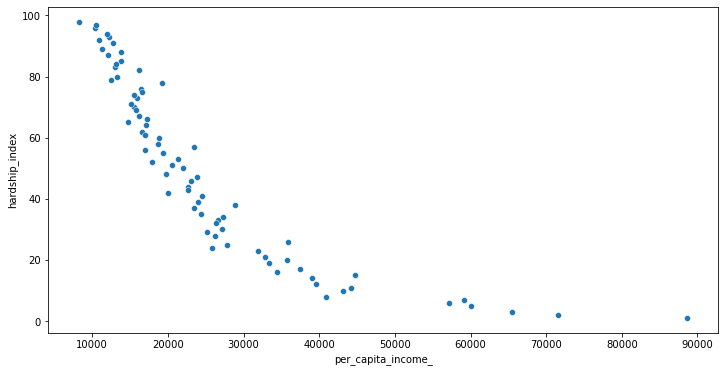

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['per_capita_income_'], y=df['hardship_index'],data=df)